# **1. Introduction**

Understanding customers (their similarities and their differences) is one of the most fundamental and important steps in quantifying the customers’ relationship with a product and the company.

Customer segmentation is a useful marketing tool for businesses that can help them improve their product or service, marketing strategy, and profitability.

Therefore, this analysis will segment customers so that a company can target them efficiently.



---

# **2. Data**

The original dataset is called *online_retail_II* and was downloaded from Kaggle website [Online Retail II UCI](https://www.kaggle.com/mashlyn/online-retail-ii-uci). 

The dataset contains all the transactions of an online retail store between 01-12-2009 and 09-12-2011.

**Load the Dataset**



In [1]:
# Import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets
from sklearn import metrics
import datetime as dt
import scipy.stats as stats
from sklearn.decomposition import PCA

In [2]:
# Read the raw data from the source into a DataFrame
df = pd.read_csv("online_retail.csv", header=0, sep=',', quotechar='"')



---


# **3. Methodology**

### **Exploratory Data Analysis (EDA)**

In this step, I will apply statistics and visualization techniques to gain a better understanding of the dataset and I will also eliminate any problems from the dataset which would prevent further analysis.

In [3]:
# Use the info() function to get an understanding of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


It can be seen from the output that this dataset contains 1,067,371 data points and 8 variables.

There are some missing values.

Moreover, 1 field is integer, 5 are objects (strings) and 2 are floats. The essential difference between these variable types is that continuous variables can take a potentially unlimited number of values, while categorical variables can take only a limited number of categories as their values.

In [4]:
# Print the first 5 rows of the DataFrame
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

**Detecting Missing Values**

In [6]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data

,Total,Percent
Customer ID,243007,22.766873
Description,4382,0.410541
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Country,0,0.000000


From the output, we can see that Customer ID and Description have some missing values. 

**Handling Missing Values**

Customer ID is a continuos variable (can take an unlimited number of different values). If I remove its missing values I would lose 22.7% of the data which is not ideal. However, I'll be grouping by Cusomer ID later in the analysis, thus, I will remove the missing values. 

Description, which represents the name of the product, is a categorical variable. Thus, I will create a new category for the its missing values: Unknown.

In [7]:
# Fill in missing values of Description with pandas fillna() function
df["Description"].fillna("Unknown", inplace=True)

# Drop missing values of Customer ID
df.dropna(axis=0, inplace=True)


In [8]:
# Verify whether we handled all missing values
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = df.isnull().sum()*100/df.isnull().count()

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percent"])

missing_data

,Total,Percent
Invoice,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
Price,0,0.0
Customer ID,0,0.0
Country,0,0.0


In [9]:
# Get univariate statistics to 
# summarize the central tendency, dispersion, 
# and shape of a dataset’s distribution
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


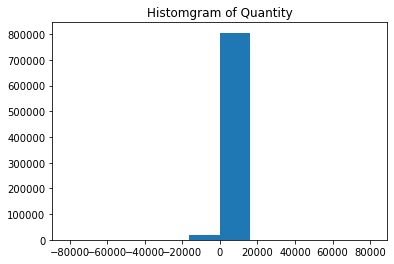

In [10]:
plt.hist(df["Quantity"])
plt.title("Histomgram of Quantity")
plt.show()

In [11]:
# Count negative values in Quantity
quantity_negative = df["Quantity"] < 0
quantity_negative.value_counts()

False    805620
True      18744
Name: Quantity, dtype: int64

In [12]:
df.iloc[quantity_negative.values]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
# Count zero values in Price
zeros = df["Price"] == 0
zeros.value_counts()

False    824293
True         71
Name: Price, dtype: int64

In [14]:
df.iloc[zeros.values]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1005014,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


It can be seen that Quantity has 18,744 negative values which represent cancelled orders. Moreover, Price has 71 zero values. In addition, if Invoice (unique number of each transaction) starts with the letter C, it indicates a cancelattion.

Later in the analysis I will use Quantity and Price to create new variables; hence, I will remove those negative values and zero values from Quantity and Price respectively. 

In [15]:
# Remove negative values from Quantity
df_2 = df
#df[df["Quantity"] < 0] = 0
df_2 = df_2[~df_2["Invoice"].str.contains("C", na = False)]

# Remove zero values from Price
df_2 = df_2.loc[~(df_2 == 0).any(axis=1)]

In [16]:
df_2.describe()

,Quantity,Price,Customer ID
count,805549.000000,805549.000000,805549.000000
mean,13.290522,3.206561,15331.954970
std,143.634088,29.199173,1696.737039
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


### **Feature Engineering**

In this final step of Exploratory Data Analysis (EDA), I will create new features from the existing ones.

**Recency, Frequency, Monetary Value (RFM)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a firm's best clients, based on the nature of their spending habits. The RFM model is based on three quantitative factors:

**1. Recency:** How recently a customer has made a purchase

**2. Frequency:** How often a customer makes a purchase

**3. Monetary Value:** How much money a customer spends on purchases

**Consequently, I will segment the customers based on RFM so that the company can target its customers efficiently.**

**Recency**

In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

In [17]:
df_2.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [18]:
# Convert InvoiceDate column to date format
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')


In [19]:
# Determine the last invoice date
final = df_2['InvoiceDate'].max()

# Subtract the last purchasing date of each customer from the last invoice date
df_2['Recency'] = final - df_2['InvoiceDate']

df_recency = df_2.groupby(df_2['Customer ID']).min()['Recency']
df_recency = pd.DataFrame(df_recency).reset_index()
df_recency.head()




,Customer ID,Recency
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


**Frequency**

In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

In [20]:
transactions = df_2['Invoice'].groupby(df_2['Customer ID']).count()

df_frequency = pd.DataFrame(transactions).reset_index()
df_frequency.head()

,Customer ID,Invoice
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17


**Monetary Value**

In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [21]:
df_2['Monetary Value']= df_2['Quantity'] * df_2['Price']

df_monetary = df_2['Monetary Value'].groupby(df_2['Customer ID']).sum()
df_monetary = pd.DataFrame(df_monetary).reset_index()
df_monetary.head()

,Customer ID,Monetary Value
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


In [22]:
# Merge Recency, Monetary Value and Frequency
df_new = pd.merge(df_recency, df_frequency, how='inner', on='Customer ID')

df_new = pd.merge(df_new, df_monetary, how="inner", on="Customer ID")

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 0 to 5877
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Customer ID     5878 non-null   float64        
 1   Recency         5878 non-null   timedelta64[ns]
 2   Invoice         5878 non-null   int64          
 3   Monetary Value  5878 non-null   float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 229.6 KB


In [24]:
df_new.head()

,Customer ID,Recency,Invoice,Monetary Value
0,12346.0,325 days 02:49:00,34,77556.46
1,12347.0,1 days 20:58:00,253,5633.32
2,12348.0,74 days 23:37:00,51,2019.40
3,12349.0,18 days 02:59:00,175,4428.69
4,12350.0,309 days 20:49:00,17,334.40


In [25]:
# Display only days on Recency column
df_new['Recency'] = df_new['Recency'].dt.days

# Set Frequency name on dataframe
df_new = df_new.rename(columns={"Invoice" : "Frequency"})

df_new.head()

,Customer ID,Recency,Frequency,Monetary Value
0,12346.0,325,34,77556.46
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,18,175,4428.69
4,12350.0,309,17,334.40


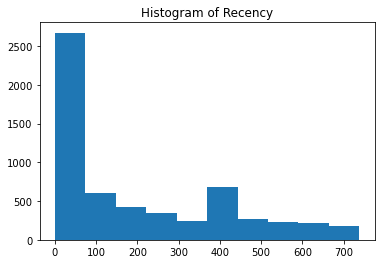

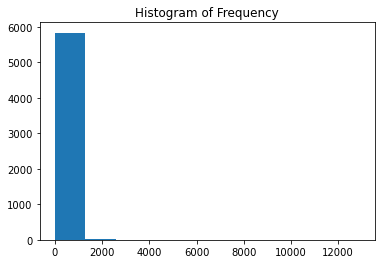

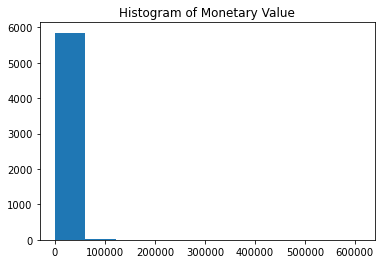

In [26]:
# Univariate visualization of the variables 
# to get a sense of their distribution

# Plot Histograms of the variables
plt.hist(df_new["Recency"])
plt.title("Histogram of Recency")
plt.show()

plt.hist(df_new["Frequency"])
plt.title("Histogram of Frequency")
plt.show()

plt.hist(df_new["Monetary Value"])
plt.title("Histogram of Monetary Value")
plt.show()

The output shows that the variables are not normally distributed. The histograms depict highly skewed distributions (positively skewed). The values that lie at extreme ends of the graphs are potential outliers.

Hence, we can see that there are potential outliers on the right side of the range of the data for Frequency and Monetary Value. 

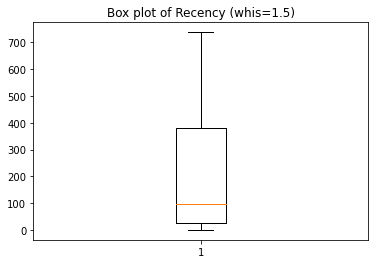

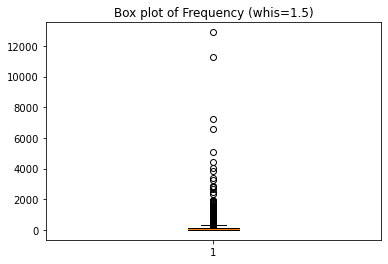

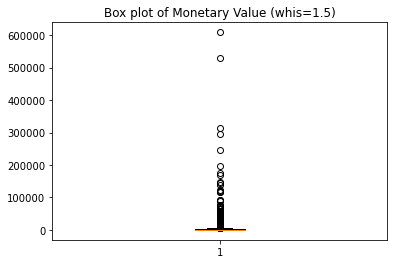

In [27]:
# Visually detect outliers with boxplots
plt.boxplot(df_new["Recency"])
plt.title("Box plot of Recency (whis=1.5)")
plt.show()

plt.boxplot(df_new["Frequency"])
plt.title("Box plot of Frequency (whis=1.5)")
plt.show()

plt.boxplot(df_new["Monetary Value"])
plt.title("Box plot of Monetary Value (whis=1.5)")
plt.show()


From the boxplots it can be seen that Frequency and Monetary Value have outliers. Outliers can be problematic because they can affect the results of an analysis.

To address the issue of normality, I will first transform the distribution of values in the dataset using Log Transformation. 

In [28]:
# Perform Log Transformation
df_log = np.log(df_new+1)

In [29]:
df_log.head()

,Customer ID,Recency,Frequency,Monetary Value
0,9.421168,5.786897,3.555348,11.258774
1,9.421249,0.693147,5.537334,8.636632
2,9.421330,4.317488,3.951244,7.611051
3,9.421411,2.944439,5.170484,8.396085
4,9.421492,5.736572,2.890372,5.815324


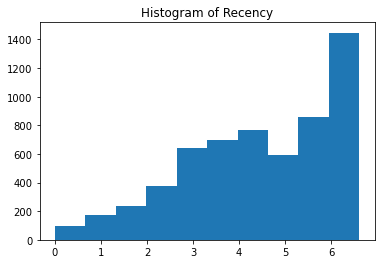

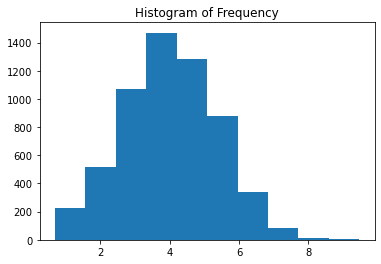

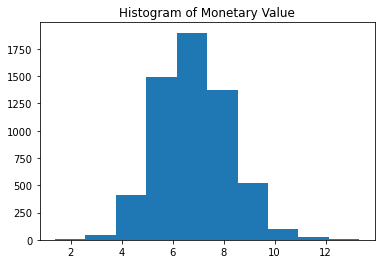

In [30]:
# Plot Histograms of the log transformed variables

plt.hist(df_log["Recency"])
plt.title("Histogram of Recency")
plt.show()

plt.hist(df_log["Frequency"])
plt.title("Histogram of Frequency")
plt.show()

plt.hist(df_log["Monetary Value"])
plt.title("Histogram of Monetary Value")
plt.show()

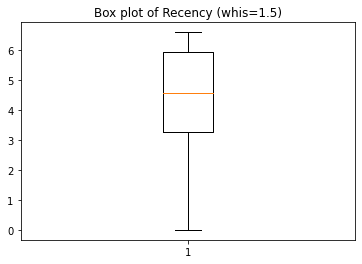

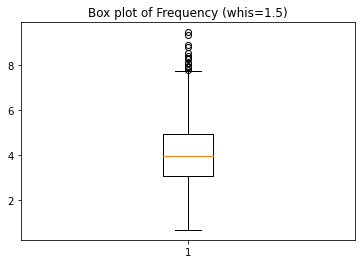

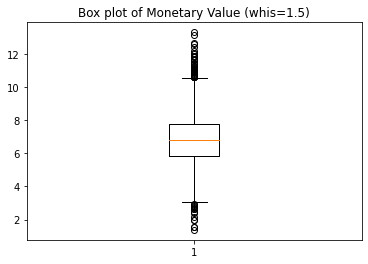

In [31]:
# Make box plots of the variables
plt.boxplot(df_log["Recency"])
plt.title("Box plot of Recency (whis=1.5)")
plt.show()

plt.boxplot(df_log["Frequency"])
plt.title("Box plot of Frequency (whis=1.5)")
plt.show()

plt.boxplot(df_log["Monetary Value"])
plt.title("Box plot of Monetary Value (whis=1.5)")
plt.show()

We can see how the log-transformed distribution is more normally distributed compared to the original distribution. The distributions are not a perfect bell shape but they are closer to a normal distribution than the original distribution. 

**Handling Outliers**

We will first identify outliers using z-scores. A z-score tells us how many standard deviations a given value is from the mean. We could define an observation to be an outlier if it has a z-score less than -3 or greater than 3.

Outliers = Observations with z-scores > 3 or < -3

Once I identify outliers, I will remove them from the dataset. 

In [32]:
# Find absolute value of z-score for each observation
z = np.abs(stats.zscore(df_log))

# Only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = df_log[(z<3).all(axis=1)]

# Find how many rows are left in the dataframe 
data_clean.shape


(5840, 4)

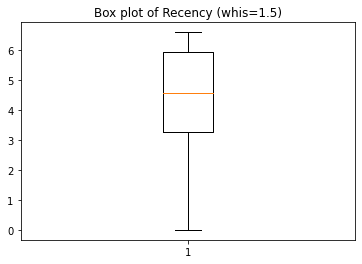

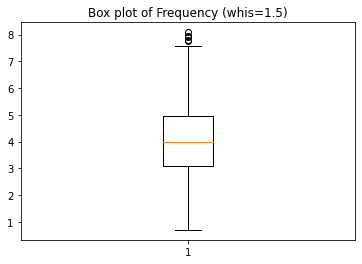

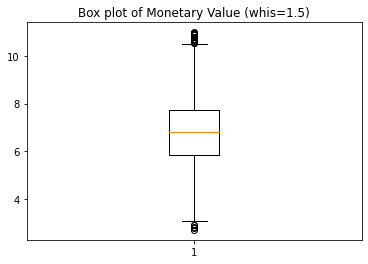

In [33]:
plt.boxplot(data_clean["Recency"])
plt.title("Box plot of Recency (whis=1.5)")
plt.show()

plt.boxplot(data_clean["Frequency"])
plt.title("Box plot of Frequency (whis=1.5)")
plt.show()

plt.boxplot(data_clean["Monetary Value"])
plt.title("Box plot of Monetary Value (whis=1.5)")
plt.show()

<!-- **Treating Outliers** -->

### **Modelling**

I will apply K-Means clustering to group similar observations (customers) based on the RFM model. 

In [34]:
data_clean.head()

,Customer ID,Recency,Frequency,Monetary Value
1,9.421249,0.693147,5.537334,8.636632
2,9.421330,4.317488,3.951244,7.611051
3,9.421411,2.944439,5.170484,8.396085
4,9.421492,5.736572,2.890372,5.815324
5,9.421573,5.926926,3.091042,5.710195


In [35]:
df_model = data_clean.drop(["Customer ID"], 1)

df_model.head()

C:\Users\asoma\AppData\Local\Temp/ipykernel_15368/2078657981.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_model = data_clean.drop(["Customer ID"], 1)


,Recency,Frequency,Monetary Value
1,0.693147,5.537334,8.636632
2,4.317488,3.951244,7.611051
3,2.944439,5.170484,8.396085
4,5.736572,2.890372,5.815324
5,5.926926,3.091042,5.710195


In [36]:
# Create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df_model)

# View first five rows of scaled DataFrame
print(scaled_df[:5])

[[-2.29157494  1.1461374   1.35926714]
 [-0.06168975 -0.03054045  0.59130098]
 [-0.9064618   0.87398107  1.17914303]
 [ 0.81140548 -0.81757277 -0.75335886]
 [ 0.92852111 -0.66870059 -0.83208034]]


Note: We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

**Find the Optimal Number of Clusters**

To perform k-means clustering in Python, we can use the KMeans function from the sklearn module.

This function uses the following basic syntax:

KMeans(init=’random’, n_clusters=8, n_init=10, random_state=None)

where:

    init: Controls the initialization technique.
    
    n_clusters: The number of clusters to place observations in.
    
    n_init: The number of initializations to perform. The default is to run the k-means algorithm 10 times and return the one with the lowest SSE.
    
    random_state: An integer value you can pick to make the results of the algorithm reproducible. 

The most important argument in this function is n_clusters, which specifies how many clusters to place the observations in.

However, we don’t know beforehand how many clusters is optimal so we must create a plot that displays the number of clusters along with the SSE (sum of squared errors) of the model.

Typically when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off. This is typically the optimal number of clusters.

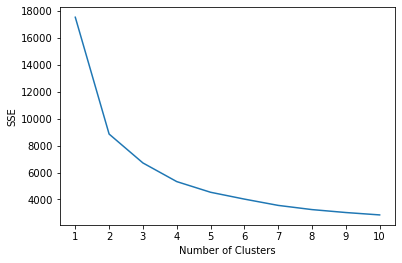

In [37]:
# Initialize kmeans parameters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

# Create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
    
# Visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In this plot it appears that there is an elbow or bend at k = 3 clusters. Thus, I will use 3 clusters when fitting the k-means clustering model. 

**Perform K-Means Clustering with Optimal K**

In [38]:
# Instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

# Fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([1, 2, 1, ..., 0, 2, 1])

In [39]:
# Append cluster assingments to original DataFrame
data_clean['Cluster'] = kmeans.labels_

C:\Users\asoma\AppData\Local\Temp/ipykernel_15368/1735227299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = kmeans.labels_


In [40]:
# View updated DataFrame
data_clean.head(10)

,Customer ID,Recency,Frequency,Monetary Value,Cluster
1,9.421249,0.693147,5.537334,8.636632,1
2,9.421330,4.317488,3.951244,7.611051,2
3,9.421411,2.944439,5.170484,8.396085,1
4,9.421492,5.736572,2.890372,5.815324,0
5,9.421573,5.926926,3.091042,5.710195,0
6,9.421654,3.583519,4.644391,7.955369,1
7,9.421735,5.318120,3.218876,6.010679,0
8,9.421816,5.446737,4.077537,6.985087,2
9,9.421897,5.365976,3.583519,6.854998,2
10,9.421978,3.135494,4.969813,8.760089,1


The Cluster column contains a cluster number (0, 1, or 2) that each customer was assigned to.

Customers that belong to the same cluster have roughly similar values for the Recency, Frequency, and Monetary Value columns.


---

# **4. Results**

3 clusters k-means


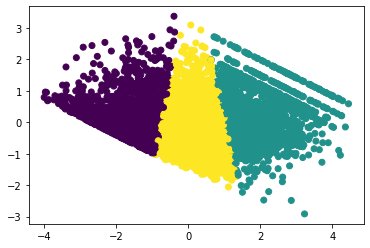

Silhouette score for 3 clusters k-means: 0.3165480409465663


In [41]:
# Instantiate the k-means class, using optimal number of clusters
k_means_3 = KMeans(init="random", n_clusters=3, n_init=10, random_state=1).fit_predict(scaled_df)

pca = PCA().fit_transform(scaled_df)

# Plot the results
print("3 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=k_means_3)
plt.show()

# Calculate the silhouette coefficient score
print("Silhouette score for 3 clusters k-means: {}".format(metrics.silhouette_score(scaled_df, k_means_3, metric='euclidean')))

From the plot it can be seen that the K-Means model identified three classes or groups of customers based on RFM.

**One of those groups represent customers who have recently purchased from the company, buy more often and spend more. These customers are more likely to buy again; they are also likely to buy more often and spend more money.**

**Compare results with different number of clusters (2,3,4 and 5)**

2 clusters k-means


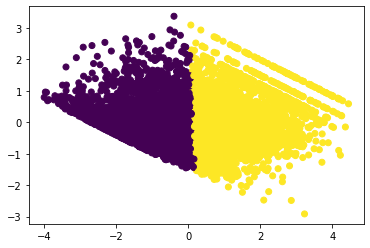

Silhouette score for 2 clusters k-means: 0.4122519138630476


In [42]:
# Instantiate the k-means class,
k_means_2 = KMeans(init="random", n_clusters=2, n_init=10, random_state=1).fit_predict(scaled_df)

pca = PCA().fit_transform(scaled_df)

# Plot the results
print("2 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=k_means_2)
plt.show()

# Calculate the silhouette coefficient score
print("Silhouette score for 2 clusters k-means: {}".format(metrics.silhouette_score(scaled_df, k_means_2, metric='euclidean')))

4 clusters k-means


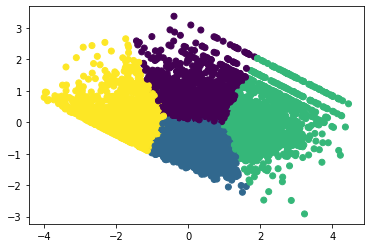

Silhouette score for 4 clusters k-means: 0.33491767982257664


In [43]:
# Instantiate the k-means class
k_means_4 = KMeans(init="random", n_clusters=4, n_init=10, random_state=1).fit_predict(scaled_df)

pca = PCA().fit_transform(scaled_df)

# Plot the results
print("4 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=k_means_4)
plt.show()

# Calculate the silhouette coefficient score
print("Silhouette score for 4 clusters k-means: {}".format(metrics.silhouette_score(scaled_df, k_means_4, metric='euclidean')))

5 clusters k-means


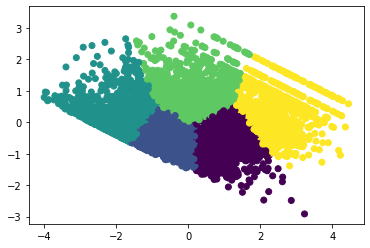

Silhouette score for 5 clusters k-means: 0.2991861070800648


In [44]:
# Instantiate the k-means class
k_means_5 = KMeans(init="random", n_clusters=5, n_init=10, random_state=1).fit_predict(scaled_df)

pca = PCA().fit_transform(scaled_df)

# Plot the results
print("5 clusters k-means")
plt.scatter(pca[:, 0], pca[:, 1], c=k_means_5)
plt.show()

# Calculate the silhouette coefficient score
print("Silhouette score for 5 clusters k-means: {}".format(metrics.silhouette_score(scaled_df, k_means_5, metric='euclidean')))


---

# **5. Discussion & Recomendations**

From a marketing perspective, companies need to understand the characteristics and preferences of their best customers because they should target their marketing efforts towards prospects who resemble their best costumers’ characteristics. But, before they can start to understand their best customers, they first need to identify them. Therefore, from this unsupervised learning analysis, interested parties will be able to segment a customer pool and identify the best customers.

Once they have identified their customers based on their purchasing behavior (RFM); they could start to analyze the characteristics and purchasing behavior of this group and try to understand what distinguishes them from typical customers. As a result, understanding their customers will help them become more precise in targeting actual and potential customers.

The next steps I would take to expand this analysis would be to predict which customers are more likely to make purchases again in the future. I would use the available consumer spending data to estimate future behavior. This approach can be used by businesses to improve their marketing plan and target potential customers. 






---

# **References**

1. https://www.kaggle.com/mashlyn/online-retail-ii-uci
2. https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp
3. https://www.investopedia.com/terms/b/behavioral-modeling.asp